### Importing Libraries

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam

### Creating a datagenerator to load the data

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   
                                   validation_split = .2)

test_datagen = ImageDataGenerator(rescale=1./255,)

In [7]:
wave_path = "/Users/praksj/Documents/VIT/Year-4/Sem 7/Cogntive Systems CSE4059/j comp/notebooks/archive/wave"
training_set = train_datagen.flow_from_directory(wave_path + '/training',
                                       target_size=(128, 128),
                                                batch_size=4,
                                     class_mode='binary',
                                                 subset = 'training'
                                            )

validation_set = train_datagen.flow_from_directory(wave_path + '/training',
                                       target_size=(128, 128),
                                                batch_size=4,
                                     class_mode='binary',
                                                 subset = 'validation'
                                            )
test_set = test_datagen.flow_from_directory(wave_path + '/testing',
                                        target_size=(128, 128),
                                                 batch_size=4,
                                      class_mode='binary',
                                               shuffle = False,
                                           )


Found 58 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


### Plot function

In [8]:
import matplotlib.pyplot as plt
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.show()
    
    accuracy = round(history.history['accuracy'][-1],4)
    validation_accuracy = round(history.history['val_accuracy'][-1],4)
    return (accuracy, validation_accuracy)

### Building a basic CNN

In [9]:
basic_cnn = Sequential()
basic_cnn.add(Conv2D(64,kernel_size =(3,3) ,input_shape=(128, 128,3), activation = 'relu'))
basic_cnn.add(MaxPooling2D(3,3))
basic_cnn.add(Conv2D(32, kernel_size = (3,3),activation = 'relu'))
basic_cnn.add(Flatten())
basic_cnn.add(Dense(16, activation = 'relu'))
basic_cnn.add(Dense(1, activation = 'sigmoid'))
basic_cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
basic_cnn.summary()

2023-10-10 19:02:42.816853: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-10 19:02:42.816881: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-10 19:02:42.816889: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-10 19:02:42.817037: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-10 19:02:42.817051: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 42, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 16)                819216    
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

In [10]:
hist_cnn =basic_cnn.fit(training_set,validation_data = validation_set,epochs = 50, )

Epoch 1/50


2023-10-10 19:02:43.749582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 3s 67ms/step - loss: 1.4532 - accuracy: 0.5345 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/50
 5/15 [=========>....................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5556

2023-10-10 19:02:46.937721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 17ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/50
15/15 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
15/15 [==============================] - 0s 17ms/step - loss: 0.6963 - accuracy: 0.4483 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
15/15 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
15/15 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
15/15 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50
15/15 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 9/50
15/15 [======

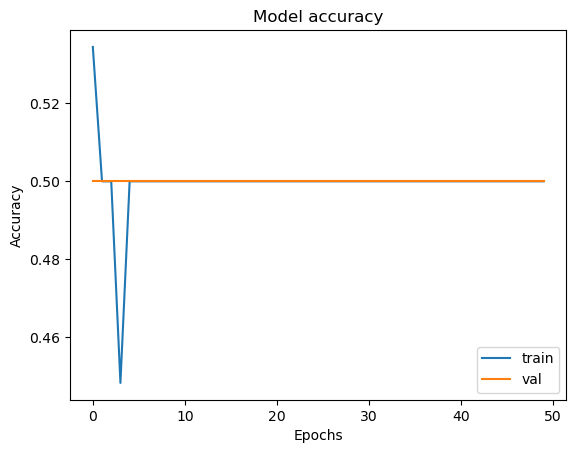

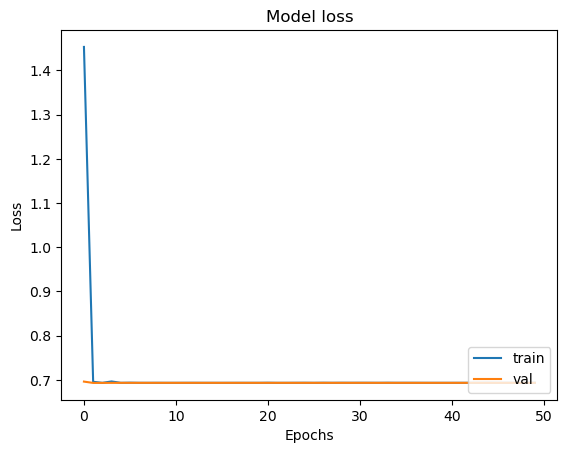

(0.5, 0.5)

In [11]:
plot(hist_cnn)

In [12]:
basic_cnn.evaluate(test_set)

8/8 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931514739990234, 0.5]

<b> The basic cnn is struggling to distinguish between wave patterns drawn by healthy people and parkinsons patients

### Mobile Net

In [20]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

mobilenet = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
for layer in mobilenet.layers:
    layer.trainable = False

In [21]:
from tensorflow.keras.models import Model


x = Flatten()(mobilenet.output)
x = Dense(32, activation='relu')(x)
x= Dense(1, activation='sigmoid')(x)  # Replace num_classes with the number of classes in your task
mobilenet_model = Model(inputs=mobilenet.input, outputs=x)

In [22]:
mobilenet_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])
mobilenet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']      

In [23]:
hist_mobilenet =mobilenet_model.fit(training_set,validation_data = validation_set,epochs = 10, )

Epoch 1/10


2023-10-10 20:58:45.309874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/15 [===========================>..] - ETA: 0s - loss: 2.0270 - accuracy: 0.6481

2023-10-10 20:58:46.587053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 3s 105ms/step - loss: 1.8876 - accuracy: 0.6724 - val_loss: 1.7777 - val_accuracy: 0.7857
Epoch 2/10
15/15 [==============================] - 0s 25ms/step - loss: 0.2257 - accuracy: 0.9483 - val_loss: 1.8018 - val_accuracy: 0.8571
Epoch 3/10
15/15 [==============================] - 0s 21ms/step - loss: 0.1987 - accuracy: 0.9310 - val_loss: 1.0176 - val_accuracy: 0.7857
Epoch 4/10
15/15 [==============================] - 0s 24ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 2.2921 - val_accuracy: 0.7143
Epoch 5/10
15/15 [==============================] - 0s 24ms/step - loss: 0.0667 - accuracy: 0.9828 - val_loss: 0.9032 - val_accuracy: 0.7857
Epoch 6/10
15/15 [==============================] - 0s 21ms/step - loss: 0.0265 - accuracy: 0.9828 - val_loss: 2.0243 - val_accuracy: 0.7857
Epoch 7/10
15/15 [==============================] - 0s 20ms/step - loss: 0.0139 - accuracy: 0.9828 - val_loss: 3.5221 - val_accuracy: 0.6429
Epoch 8/10
15/15 [=====

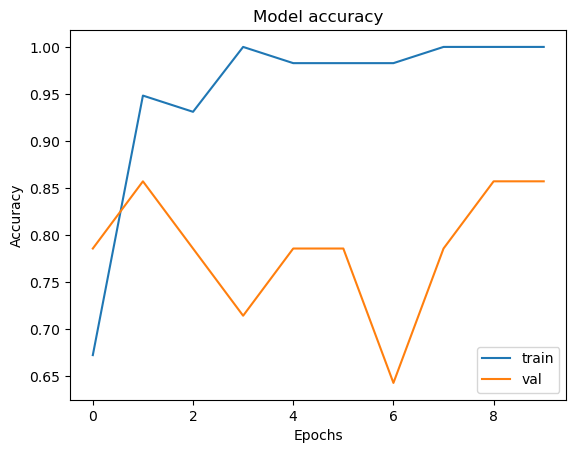

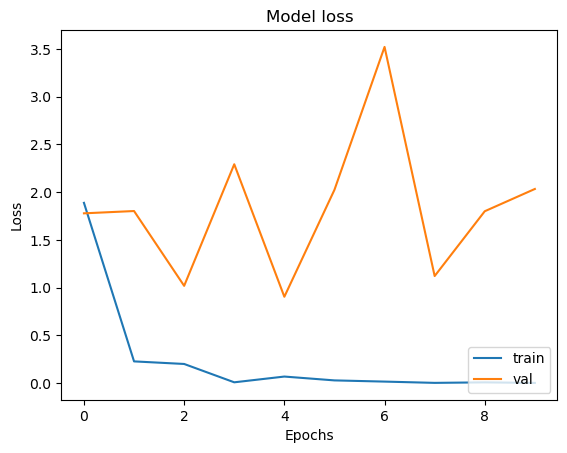

(1.0, 0.8571)

In [24]:
plot(hist_mobilenet)

In [25]:
mobilenet_model.evaluate(test_set)

8/8 [==============================] - 0s 14ms/step - loss: 1.3263 - accuracy: 0.8333


[1.3262896537780762, 0.8333333134651184]

<b> The mobilenet model performs incredibly well with a test accuarcy of 83.33%

### Resenet50

In [26]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [27]:
resnet =ResNet50(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
for layer in resnet.layers:
    layer.trainable = False

In [28]:
x = Flatten()(resnet.output)
x = Dense(32, activation='relu')(x)
x= Dense(1, activation='sigmoid')(x)  # Replace num_classes with the number of classes in your task
resnet_model = Model(inputs=resnet.input, outputs=x)

In [29]:
resnet_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [30]:
hist_resnet =resnet_model.fit(training_set,validation_data = validation_set,epochs = 40, )

Epoch 1/40


2023-10-10 20:58:53.022607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/15 [=========================>....] - ETA: 0s - loss: 1.5949 - accuracy: 0.3600

2023-10-10 20:58:56.291111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 5s 175ms/step - loss: 1.4905 - accuracy: 0.3966 - val_loss: 1.0501 - val_accuracy: 0.5000
Epoch 2/40
15/15 [==============================] - 1s 47ms/step - loss: 0.7378 - accuracy: 0.5345 - val_loss: 0.8020 - val_accuracy: 0.5000
Epoch 3/40
15/15 [==============================] - 0s 32ms/step - loss: 0.6703 - accuracy: 0.5345 - val_loss: 0.7146 - val_accuracy: 0.5000
Epoch 4/40
15/15 [==============================] - 0s 32ms/step - loss: 0.6870 - accuracy: 0.5172 - val_loss: 0.6807 - val_accuracy: 0.4286
Epoch 5/40
15/15 [==============================] - 0s 27ms/step - loss: 0.6831 - accuracy: 0.5862 - val_loss: 0.7248 - val_accuracy: 0.5714
Epoch 6/40
15/15 [==============================] - 0s 32ms/step - loss: 0.6932 - accuracy: 0.5172 - val_loss: 0.7467 - val_accuracy: 0.5000
Epoch 7/40
15/15 [==============================] - 1s 36ms/step - loss: 0.6652 - accuracy: 0.5517 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 8/40
15/15 [=====

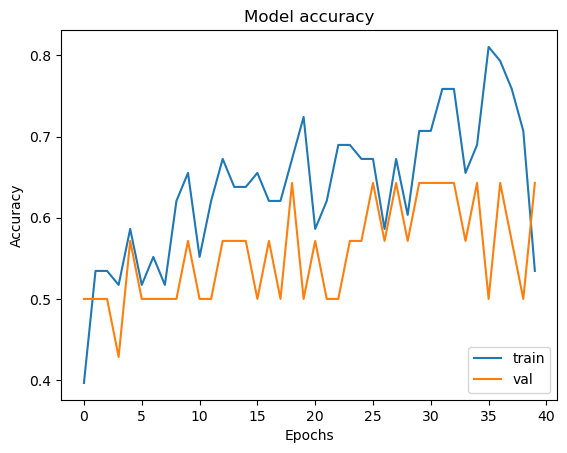

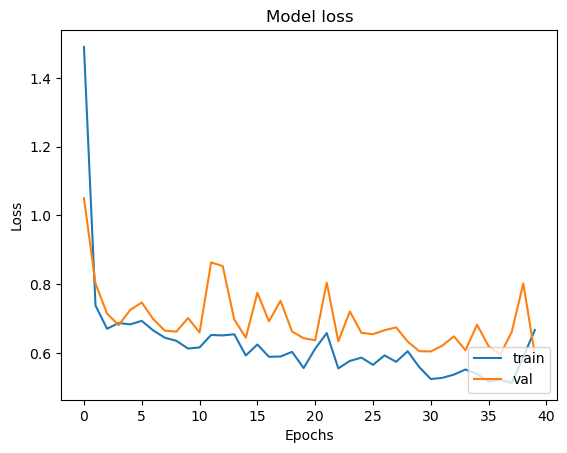

(0.5345, 0.6429)

In [31]:
plot(hist_resnet)

In [32]:
resnet_model.evaluate(test_set)

8/8 [==============================] - 0s 18ms/step - loss: 0.5820 - accuracy: 0.7333


[0.5820324420928955, 0.7333333492279053]

<b> Resnet performed better than the cnn but worse than the mobilenet model

### Saving models

In [34]:
resnet_model.save('wave_resnet.h5')
mobilenet_model.save('wave_mobilenet.h5')
basic_cnn.save('wave_cnn.h5')